In [1]:
# import neccessary packages

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as plt
plt.rcParams['figure.figsize'] = [10, 6]
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
import xgboost as xgb
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
import category_encoders as ce
from sklearn.utils import resample, shuffle
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from prettytable import PrettyTable 
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from matplotlib.cm import viridis
from sklearn.pipeline import Pipeline
colors = viridis(np.linspace(0, 1, 4))
import joblib

## Exploratory Data Analysis

In [2]:
# load data
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# view data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# number of observations
len(df)

768

In [5]:
# number of features
len(df.columns)

9

In [6]:
# check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# 5 number summary of variables
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


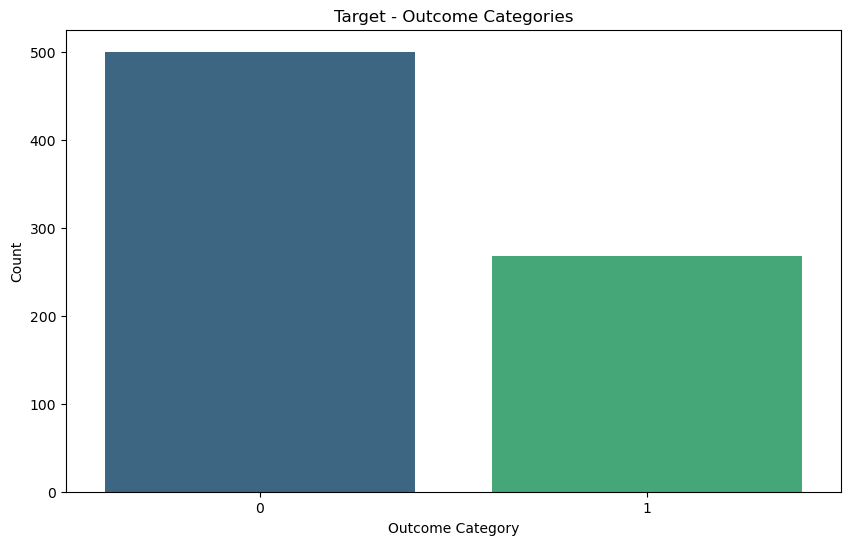

0    500
1    268
Name: Outcome, dtype: int64


In [8]:
# visualize independent variable
plt.figure(figsize=(10, 6))  
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.xlabel('Outcome Category')
plt.ylabel('Count')
plt.title('Target - Outcome Categories')
plt.show()

print(df['Outcome'].value_counts())

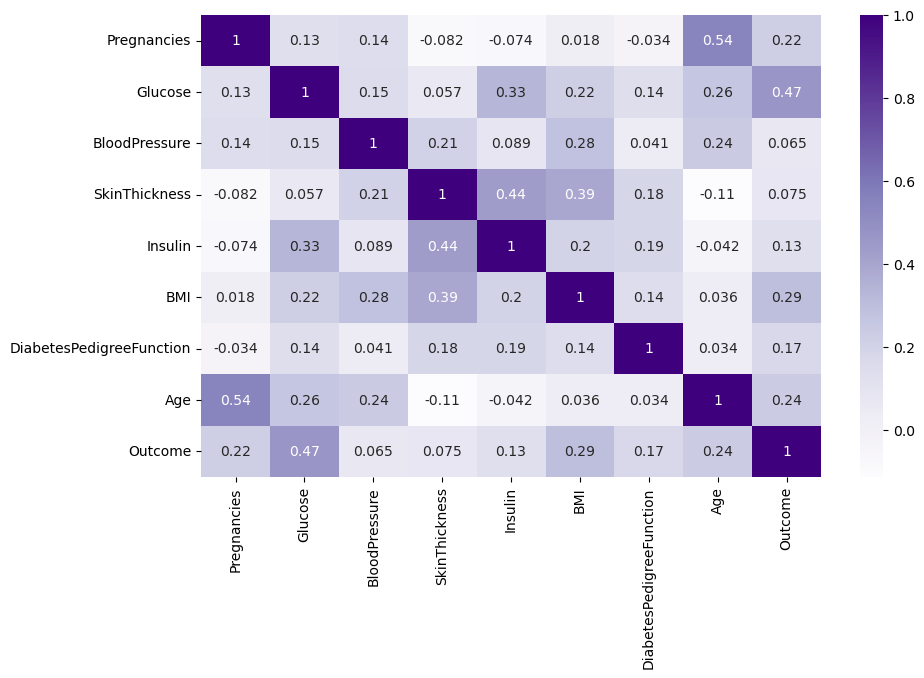

In [9]:
data = df
cor_matrix = data.corr()
sns.heatmap(cor_matrix, annot=True, cmap = "Purples")
plt.show()

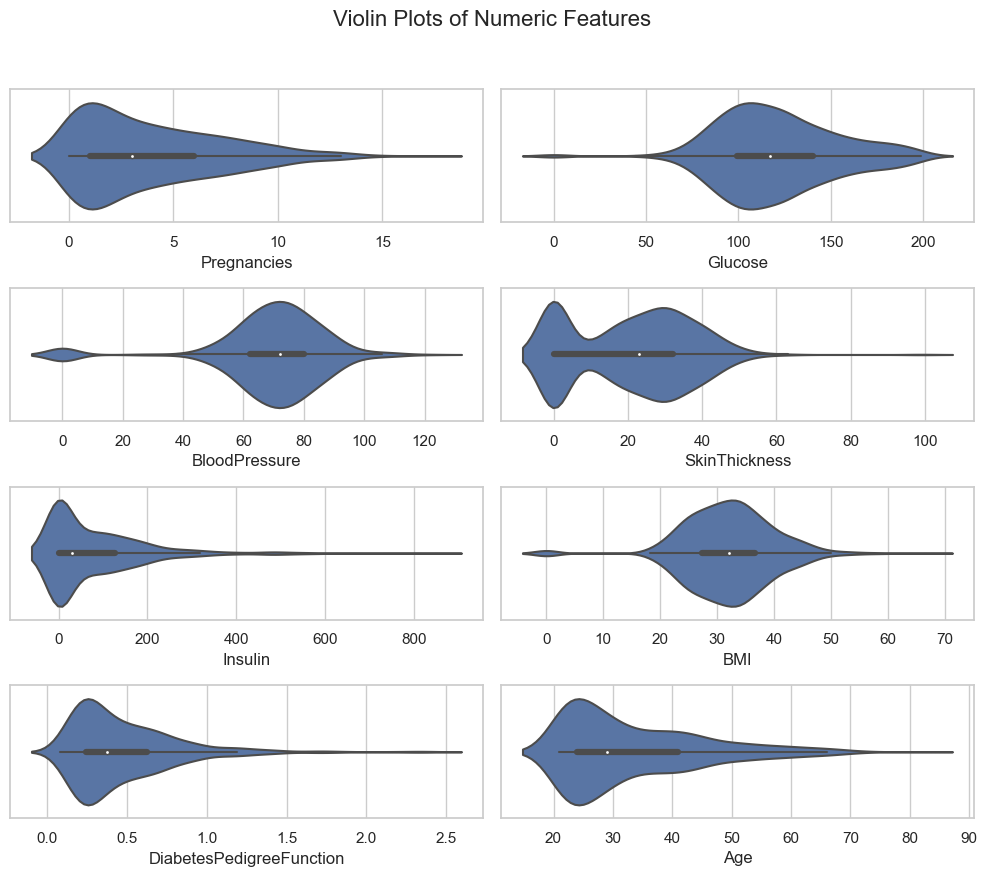

In [10]:
data_num = data.iloc[:, :-1]
sns.set(style="whitegrid")
num_features = len(data_num.columns)
num_rows = 6
num_cols = (num_features - 1) // num_rows + 1

plt.figure(figsize=(10, 12))

for i, feature in enumerate(data_num.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.violinplot(x=data_num[feature])

plt.suptitle('Violin Plots of Numeric Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

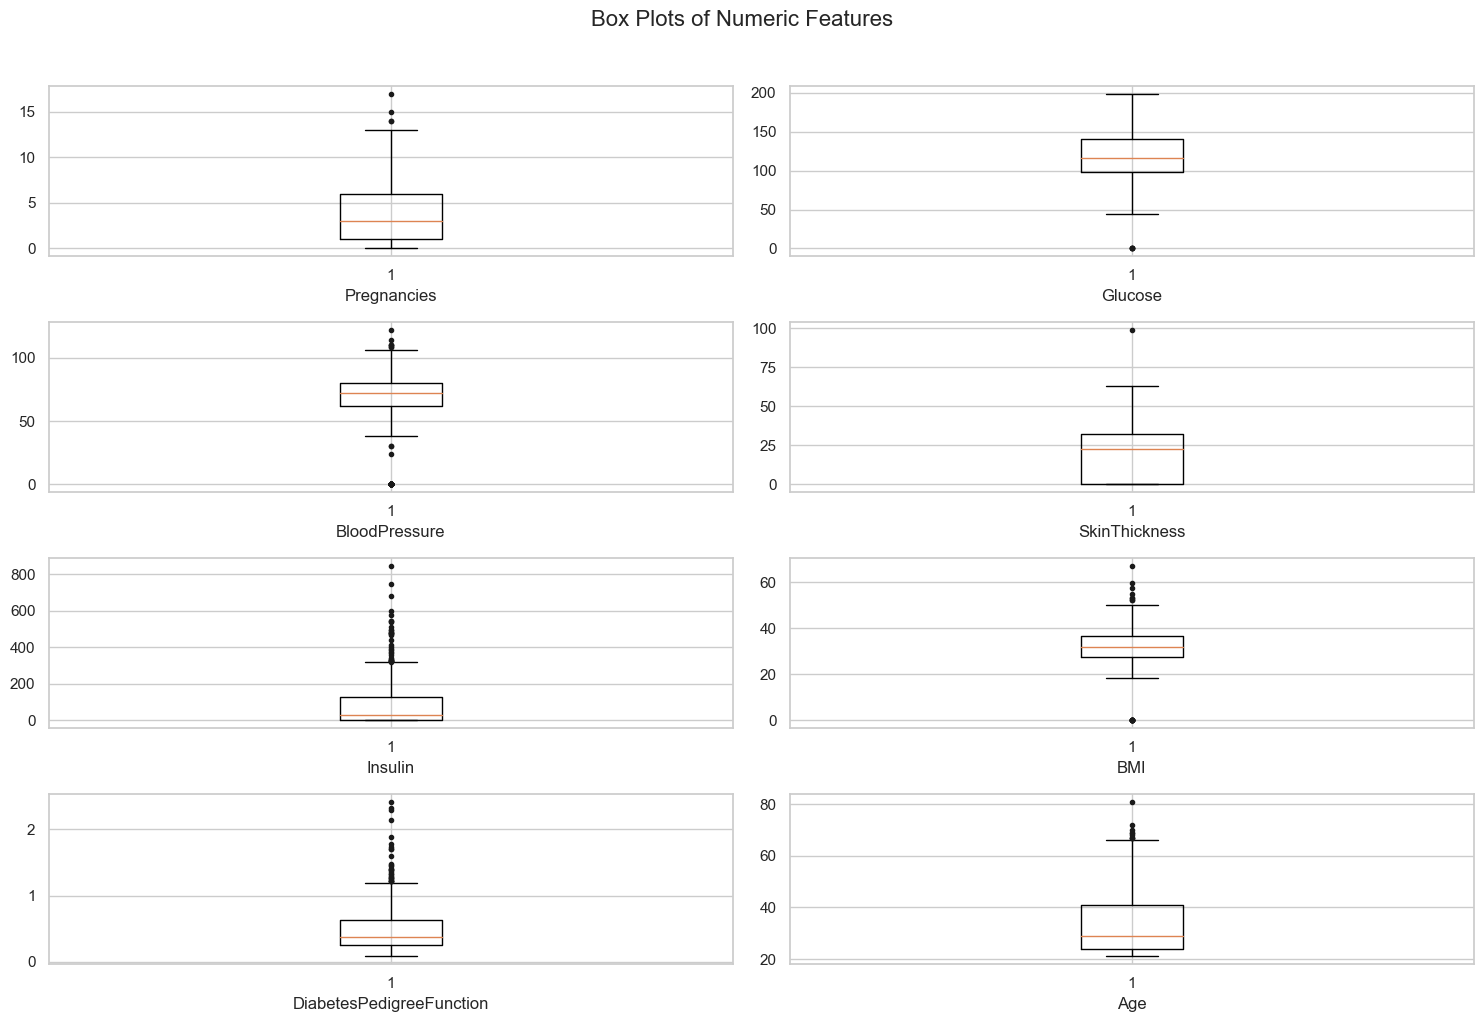

In [11]:
num_features = len(data_num.columns)
num_rows = 4
num_cols = (num_features - 1) // num_rows + 1

plt.figure(figsize=(15, 10))

for i, feature in enumerate(data_num.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.boxplot(x=data_num[feature], sym='k.')
    plt.xlabel(feature)

plt.suptitle('Box Plots of Numeric Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## Splitting the Data

In [12]:
Y = data["Outcome"]
X = data.drop(["Outcome"], axis=1)

In [13]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
# Split data into an 70% train, 30% test set with the remaining data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [16]:
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 537
Test set size: 231


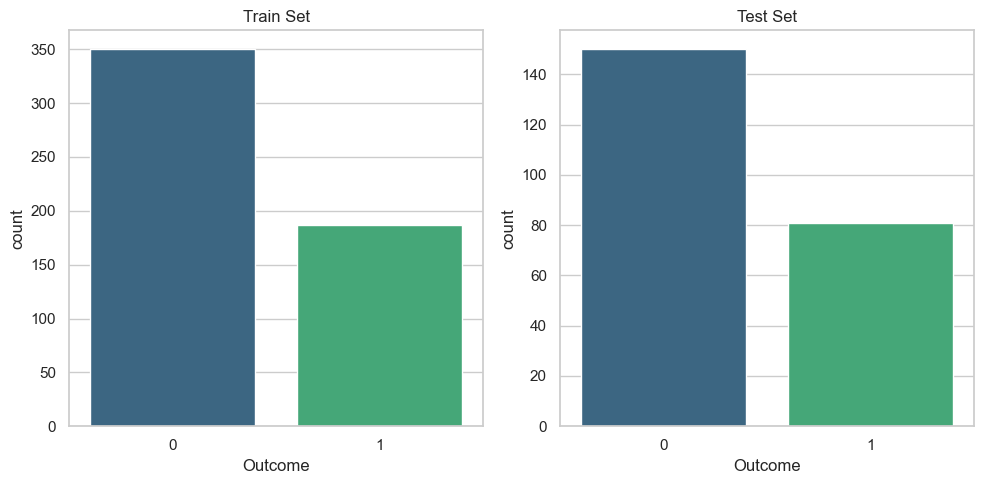

In [17]:
# Plotting the class distribution for y_train and y_test
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette="viridis")
plt.title("Train Set")

plt.subplot(1, 2, 2)
sns.countplot(x=y_test, palette="viridis")
plt.title("Test Set")

plt.tight_layout()
plt.show()

## SMOTE

In [18]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

X_train = X_resampled
y_train = y_resampled

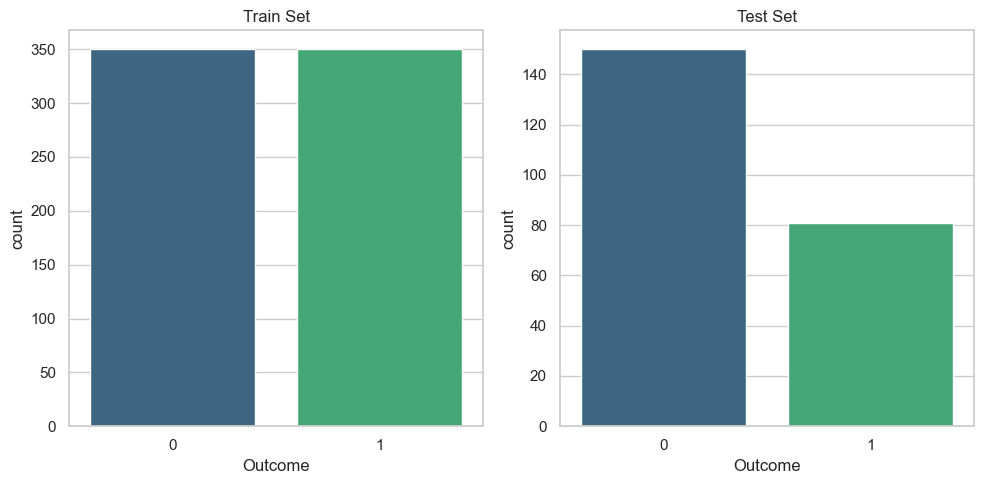

In [19]:
# Plotting the class distribution for y_train and y_test after SMOTE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette="viridis")
plt.title("Train Set")

plt.subplot(1, 2, 2)
sns.countplot(x=y_test, palette="viridis")
plt.title("Test Set")

plt.tight_layout()
plt.show()

In [20]:
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 700
Test set size: 231


## Feature Selection

In [21]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
feature_importances = tree_model.feature_importances_

In [23]:
sorted_indices = feature_importances.argsort()[::-1]

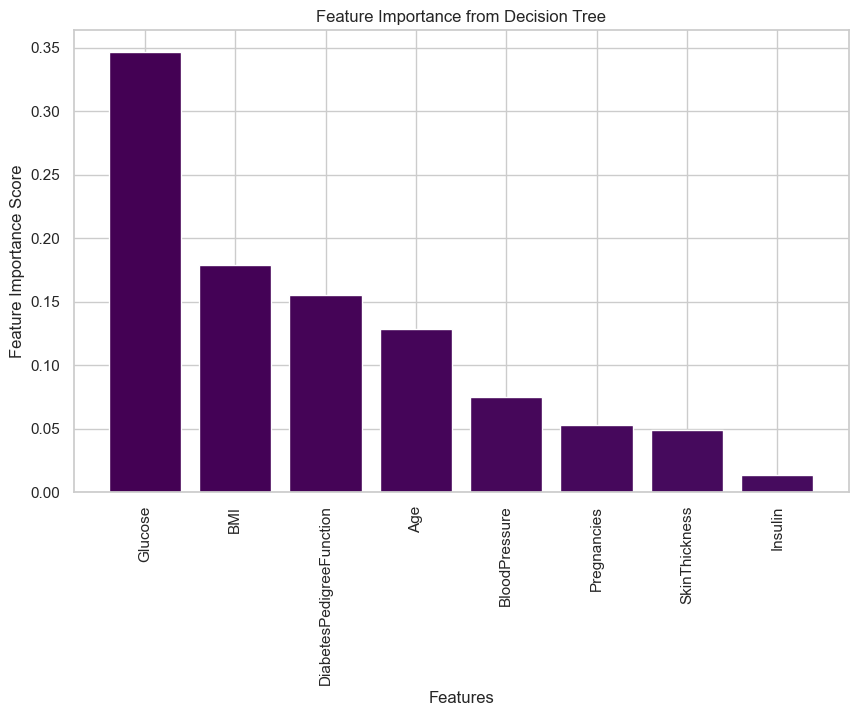

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', color=plt.cm.viridis(range(len(feature_importances))))
plt.xticks(range(len(feature_importances)), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance from Decision Tree')
plt.show()

### Keeping only important features

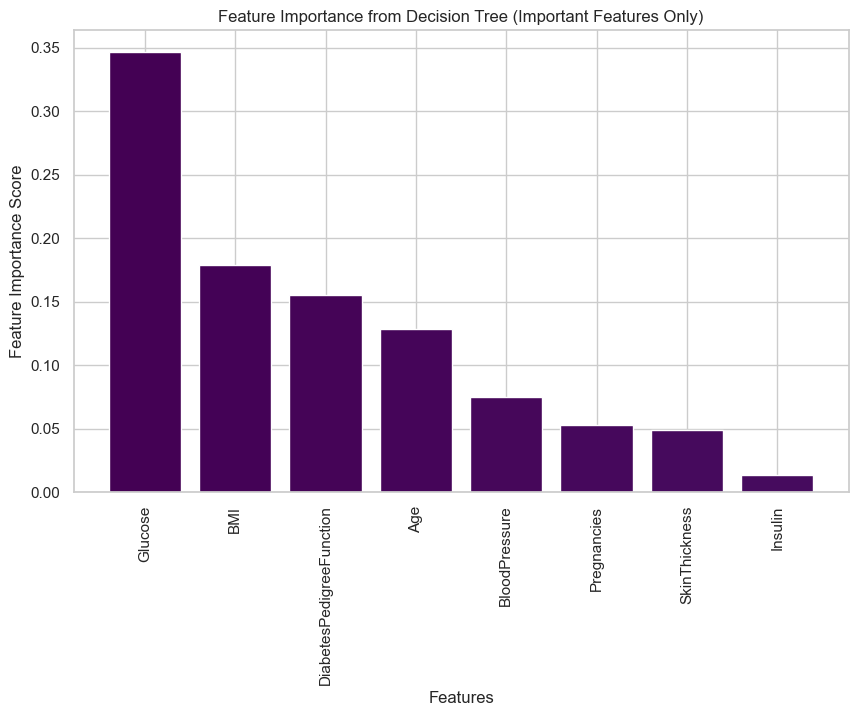

In [25]:
threshold = 0.001

important_feature_indices = sorted_indices[feature_importances[sorted_indices] > threshold]

important_features = X_train.columns[important_feature_indices]

X_train = X_train.iloc[:, important_feature_indices]
X_test = X_test.iloc[:, important_feature_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(important_features)), 
        feature_importances[important_feature_indices], 
        align='center', color=plt.cm.viridis(range(len(feature_importances))))
plt.xticks(range(len(important_features)), 
           important_features, 
           rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance from Decision Tree (Important Features Only)')
plt.show()

In [26]:
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 700
Test set size: 231


## Model building (NO TUNING)

### Neural Net

In [110]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred_nn = mlp_classifier.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn)

precision_nn = precision_score(y_test, y_pred_nn, average='weighted')

recall_nn = recall_score(y_test, y_pred_nn, average='weighted')

f1_nn = f1_score(y_test, y_pred_nn, average='weighted')

### SVM

In [111]:
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

### Random Forest

In [112]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

### XGB

In [113]:

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test, label=y_test_encoded)

model = xgb.train({}, dtrain)
y_pred = model.predict(dtest)
y_pred_xgb = label_encoder.inverse_transform(y_pred.astype(int))

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted', zero_division=1)

### Model Results

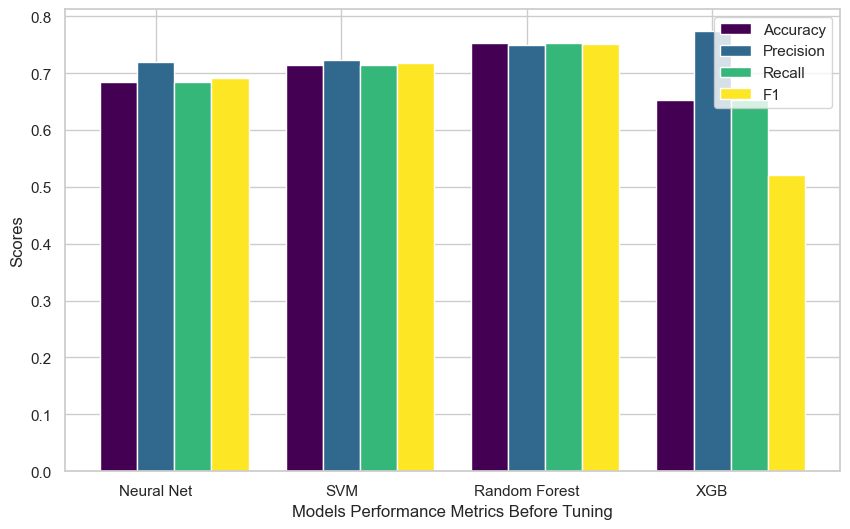

In [114]:
# create data 
x = np.arange(4) 
acc = [accuracy_nn, accuracy_svm, accuracy_rf, accuracy_xgb] 
prec = [precision_nn, precision_svm, precision_rf, precision_xgb] 
rec = [recall_nn, recall_svm, recall_rf, recall_xgb] 
f = [f1_nn, f1_svm, f1_rf, f1_xgb] 
width = 0.2


  
# plot data in grouped manner of bar type 
plt.bar(x-0.2, acc, width, color=colors[0]) 
plt.bar(x, prec, width, color=colors[1]) 
plt.bar(x+0.2, rec, width, color=colors[2]) 
plt.bar(x+0.4, f, width, color=colors[3]) 
plt.xticks(x, ['Neural Net', 'SVM', 'Random Forest', 'XGB']) 
plt.xlabel("Models Performance Metrics Before Tuning") 
plt.ylabel("Scores") 
plt.legend(["Accuracy", "Precision", "Recall", "F1"]) 
plt.show()


In [115]:
myTable = PrettyTable(["Model Name", "Accuracy", "Precision", "Recall", "F1"]) 

myTable.add_row(["Neural Net", accuracy_nn, precision_nn, recall_nn, f1_nn ]) 
myTable.add_row(["SVM", accuracy_svm, precision_svm, recall_svm, f1_svm]) 
myTable.add_row(["Random Forest", accuracy_rf, precision_rf, recall_rf, f1_rf]) 
myTable.add_row(["XGB", accuracy_xgb, precision_xgb, recall_xgb, f1_xgb])

print(myTable)

+---------------+--------------------+--------------------+--------------------+--------------------+
|   Model Name  |      Accuracy      |     Precision      |       Recall       |         F1         |
+---------------+--------------------+--------------------+--------------------+--------------------+
|   Neural Net  | 0.683982683982684  | 0.7193624557260921 | 0.683982683982684  | 0.6910648517649929 |
|      SVM      | 0.7142857142857143 | 0.7237048665620094 | 0.7142857142857143 | 0.7176652537518615 |
| Random Forest | 0.7532467532467533 | 0.750170881749829  | 0.7532467532467533 | 0.7513401290158104 |
|      XGB      | 0.6536796536796536 | 0.7741389045736872 | 0.6536796536796536 | 0.5211976726739243 |
+---------------+--------------------+--------------------+--------------------+--------------------+


## Model building (WITH TUNING)

### Neural Net

In [116]:
mlp_classifier = MLPClassifier(max_iter=2000, random_state=42)

param_grid = {
    'mlp__hidden_layer_sizes': [(100, 50), (50, 25)],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'adaptive'],
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp_classifier) 
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_mlp_classifier = grid_search.best_estimator_
y_pred_nn_cv = best_mlp_classifier.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn_cv)
precision_nn = precision_score(y_test, y_pred_nn_cv, average='weighted')
recall_nn = recall_score(y_test, y_pred_nn_cv, average='weighted')
f1_nn = f1_score(y_test, y_pred_nn_cv, average='weighted')

### SVM

In [117]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

svm_classifier = SVC(random_state=42)

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_svm_classifier = grid_search.best_estimator_
y_pred_svm_cv = best_svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm_cv)
precision_svm = precision_score(y_test, y_pred_svm_cv, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm_cv, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm_cv, average='weighted')

### Random Forest

In [118]:
rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_rf_cv = best_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf_cv)
precision_rf = precision_score(y_test, y_pred_rf_cv, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf_cv, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf_cv, average='weighted')

### XGB

In [119]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_classifier = XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train_encoded)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_pred_xgb_cv = label_encoder.inverse_transform(y_pred)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb_cv)
precision_xgb = precision_score(y_test, y_pred_xgb_cv, average='weighted', zero_division=1)
recall_xgb = recall_score(y_test, y_pred_xgb_cv, average='weighted', zero_division=1)
f1_xgb = f1_score(y_test, y_pred_xgb_cv, average='weighted', zero_division=1)

### Model Results after Tuning

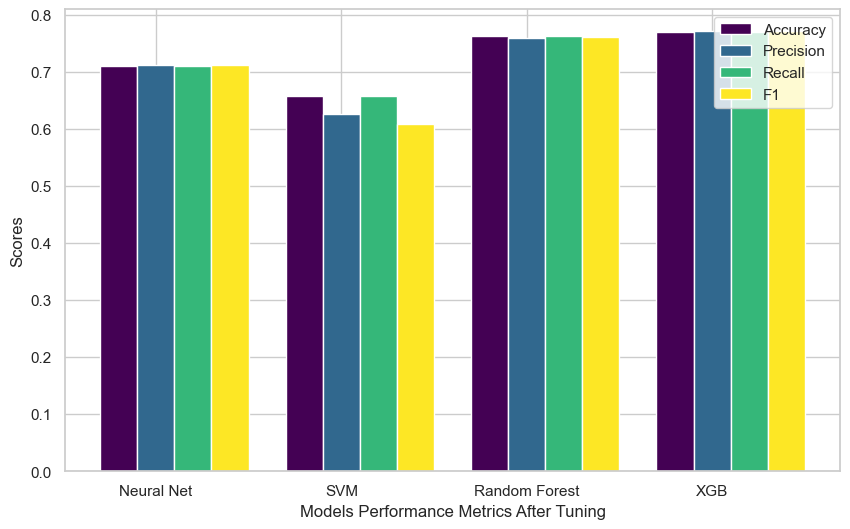

In [120]:
# create data 
x = np.arange(4) 
acc = [accuracy_nn, accuracy_svm, accuracy_rf, accuracy_xgb] 
prec = [precision_nn, precision_svm, precision_rf, precision_xgb] 
rec = [recall_nn, recall_svm, recall_rf, recall_xgb] 
f = [f1_nn, f1_svm, f1_rf, f1_xgb] 
width = 0.2


plt.bar(x-0.2, acc, width, color=colors[0]) 
plt.bar(x, prec, width, color=colors[1]) 
plt.bar(x+0.2, rec, width, color=colors[2]) 
plt.bar(x+0.4, f, width, color=colors[3]) 
plt.xticks(x, ['Neural Net', 'SVM', 'Random Forest', 'XGB']) 
plt.xlabel("Models Performance Metrics After Tuning") 
plt.ylabel("Scores") 
plt.legend(["Accuracy", "Precision", "Recall", "F1"]) 
plt.show()

In [121]:
myTable = PrettyTable(["Model Name", "Accuracy", "Precision", "Recall", "F1"]) 

myTable.add_row(["Neural Net", accuracy_nn, precision_nn, recall_nn, f1_nn ]) 
myTable.add_row(["SVM", accuracy_svm, precision_svm, recall_svm, f1_svm]) 
myTable.add_row(["Random Forest", accuracy_rf, precision_rf, recall_rf, f1_rf]) 
myTable.add_row(["XGB", accuracy_xgb, precision_xgb, recall_xgb, f1_xgb])

print(myTable)

+---------------+--------------------+--------------------+--------------------+--------------------+
|   Model Name  |      Accuracy      |     Precision      |       Recall       |         F1         |
+---------------+--------------------+--------------------+--------------------+--------------------+
|   Neural Net  |  0.70995670995671  | 0.7125408605000441 |  0.70995670995671  | 0.7111286020376929 |
|      SVM      | 0.658008658008658  | 0.6267967271422046 | 0.658008658008658  | 0.6078680809010195 |
| Random Forest | 0.7619047619047619 | 0.7600373482726424 | 0.7619047619047619 | 0.7608372697107986 |
|      XGB      | 0.7705627705627706 | 0.7712327776986477 | 0.7705627705627706 | 0.7708828914483756 |
+---------------+--------------------+--------------------+--------------------+--------------------+


Precision/Recall score for Neural Net is : 0.680
Precision/Recall score for Neural Net CV is : 0.663
Precision/Recall score for SVM is : 0.679
Precision/Recall score for SVM CV is : 0.509
Precision/Recall score for Random Forest is : 0.705
Precision/Recall score for Random Forest CV is : 0.717
Precision/Recall score for XGBoost is : 0.679
Precision/Recall score for XGBoost CV is : 0.731


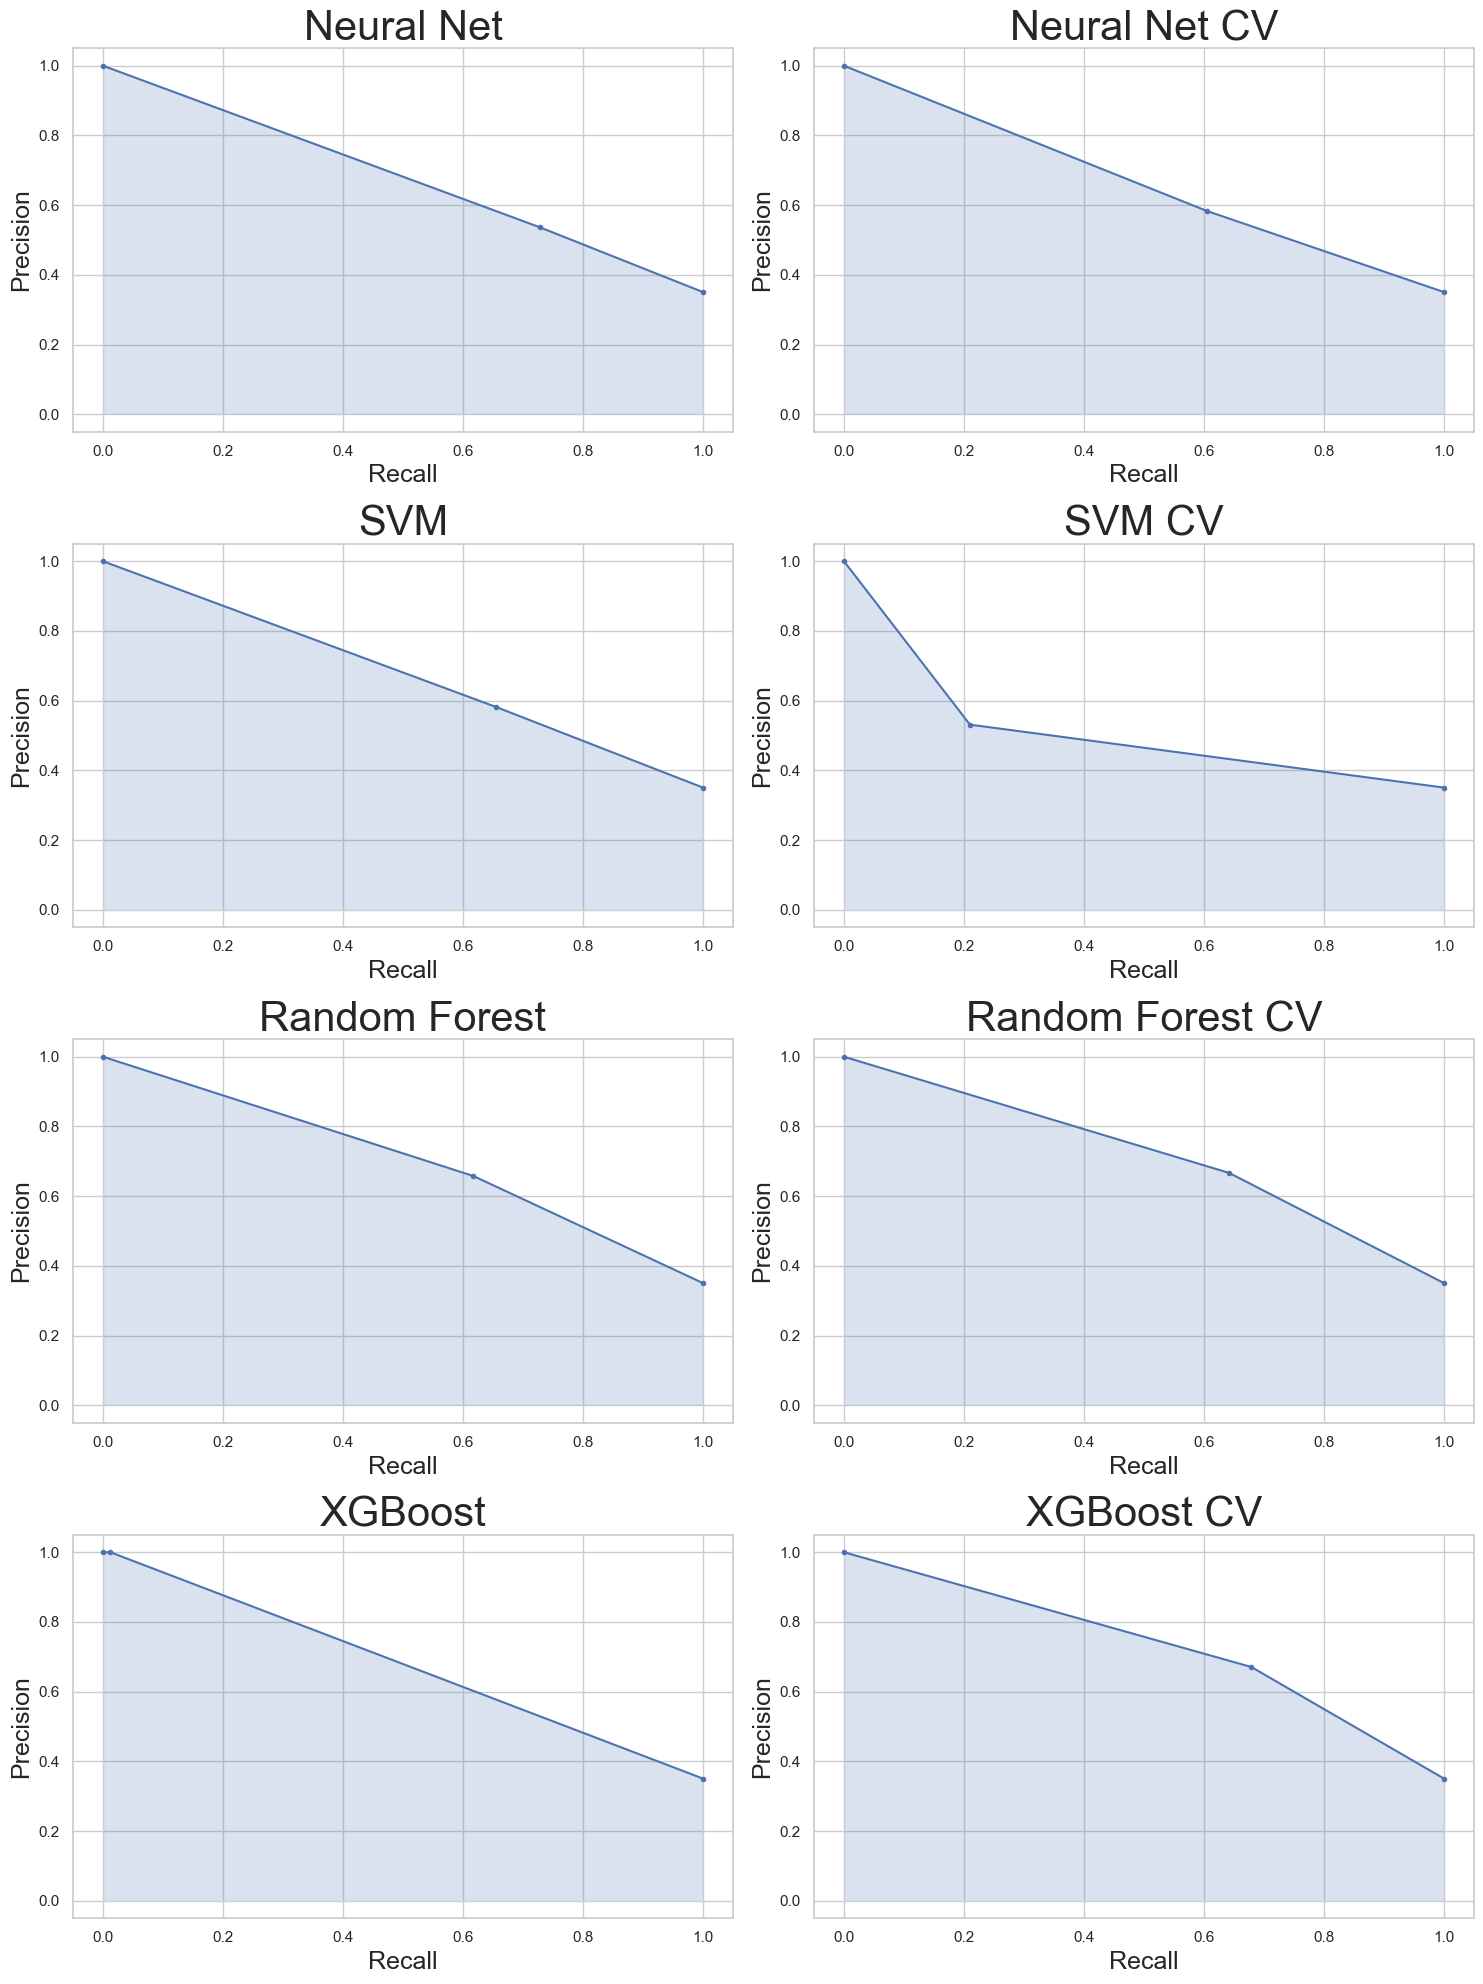

In [122]:
def precision_recall():
    models = ['Neural Net', 'Neural Net CV', 'SVM', 'SVM CV', 'Random Forest', 
              'Random Forest CV', 'XGBoost', 'XGBoost CV']
    
    pred_val = [y_pred_nn, y_pred_nn_cv, y_pred_svm, y_pred_svm_cv, 
                y_pred_rf, y_pred_rf_cv, y_pred_xgb, y_pred_xgb_cv]
    
    f, aa = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
    for i, m, p in zip(aa.flatten(), models, pred_val):
        precision, recall, thresholds = precision_recall_curve(y_test, p)
        i.plot(recall, precision, marker='.')
        i.fill_between(recall, precision, alpha=0.2)
        i.set_xlabel("Recall", fontsize=18)
        i.set_ylabel("Precision", fontsize=18)
        i.set_title(m, fontsize=30)
        pr_score = auc(recall, precision)
        print('Precision/Recall score for', m, 'is : {:.3f}'.format(pr_score))
    plt.tight_layout()
    plt.show()

precision_recall()

RF CV and XG Boost CV have the highest performance

## Stacking

In [27]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

svm_classifier = SVC(random_state=42)

grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

best_svm_classifier = grid_search_svm.best_estimator_

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_classifier = XGBClassifier()

grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=3)
grid_search_xgb.fit(X_train, y_train_encoded)

best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

estimators = [
    ('xgb', best_model_xgb),
    ('svm', best_svm_classifier)
]

stacked_model = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())

stacked_model.fit(X_train, y_train)

y_pred_stacked = stacked_model.predict(X_test)

accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
precision_stacked = precision_score(y_test, y_pred_stacked, average='weighted')
recall_stacked = recall_score(y_test, y_pred_stacked, average='weighted')
f1_stacked = f1_score(y_test, y_pred_stacked, average='weighted')

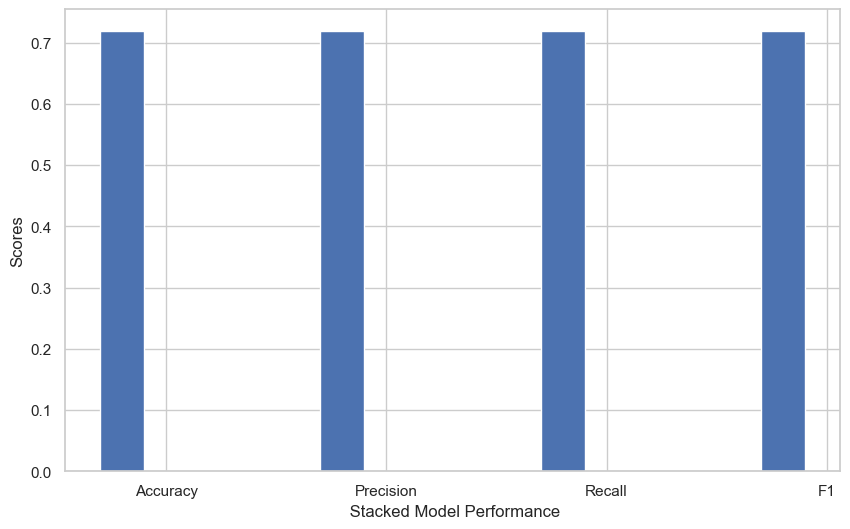

In [30]:
x = np.arange(4) 
acc = [accuracy_stacked] 
prec = [precision_stacked] 
rec = [recall_stacked] 
f = [f1_stacked] 
width = 0.2

plt.bar(x-0.2, acc, width) 
plt.xticks(x, ["Accuracy", "Precision", "Recall", "F1"]) 
plt.xlabel(" Stacked Model Performance") 
plt.ylabel("Scores") 
plt.show()

In [28]:
myTable = PrettyTable(["Model Name", "Accuracy", "Precision", "Recall", "F1"]) 

myTable.add_row(["Stacking", accuracy_stacked, precision_stacked, recall_stacked, f1_stacked]) 

print(myTable)

+------------+--------------------+--------------------+--------------------+--------------------+
| Model Name |      Accuracy      |     Precision      |       Recall       |         F1         |
+------------+--------------------+--------------------+--------------------+--------------------+
|  Stacking  | 0.7186147186147186 | 0.7085757336586066 | 0.7186147186147186 | 0.6984976924323342 |
+------------+--------------------+--------------------+--------------------+--------------------+


Precision/Recall score for Stacked is : 0.638


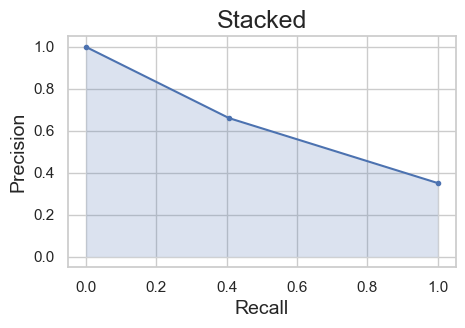

In [125]:
def precision_recall(y_test, y_pred_stacked):
    model = 'Stacked'
    precision, recall, _ = precision_recall_curve(y_test, y_pred_stacked)
    
    plt.figure(figsize=(5, 3))
    plt.plot(recall, precision, marker='.')
    plt.fill_between(recall, precision, alpha=0.2)
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)
    plt.title(model, fontsize=18)
    pr_score = auc(recall, precision)
    print('Precision/Recall score for', model, 'is : {:.3f}'.format(pr_score))
    plt.show()

precision_recall(y_test, y_pred_stacked)

## Export stacked model for Streamlit

In [126]:
joblib.dump(stacked_model, 'stacked_model_diabetes.pkl')

['stacked_model_diabetes.pkl']